# Linear Regression: Pt4

In this Jupyter notebook we're going to:
* Load the dataset
* Split the data into training/test set
* Perform linear regression
* Score our model's training and test set
* Plot the residuals

## Step 1: Loading the dataset

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

boston = load_boston()
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston['target']

In [2]:
print("The number of rows is:", boston_df.shape[0])
print("The number of columns is:", boston_df.shape[1])

The number of rows is: 506
The number of columns is: 14


## Step 2: Split data into training/test

In [3]:
from sklearn.model_selection import train_test_split
X = boston_df[['RM']]
y = boston_df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
X_train.shape

(404, 1)

In [5]:
y_train.shape

(404, 1)

In [6]:
X_test.shape

(102, 1)

In [7]:
y_test.shape

(102, 1)

## Step 3: Linear Regression using OLS


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

## Step 4: Scoring model

In [9]:
from sklearn.metrics import mean_absolute_error

r2_score_train = model.score(X_train, y_train)
y_hat_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_hat_train)
print("r2 score: ", r2_score_train, " MAE:", mae_train)

r2 score:  0.5050658352776293  MAE: 4.433067411904488


In [10]:
r2_score_test = model.score(X_test, y_test)
y_hat_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_hat_test)
print("r2 score: ", r2_score_test, " MAE:", mae_test)

r2 score:  0.3707569232254778  MAE: 4.478335832064149


## Step 5: Visualise the model error

In [11]:
residuals = y_train - y_hat_train
residuals.shape

(404, 1)

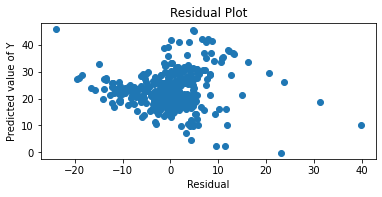

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(residuals, y_hat_train)
plt.title("Residual Plot")
plt.xlabel('Residual')
_ = plt.ylabel('Predicted value of Y')